# Setup for raw approach

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import metrics

In [15]:
df = pd.read_csv("./dataset_2.csv")

### Removing outliers from the dataset

In [16]:
df["XY"] = df["X"]*df["Y"]
q1,q3 = df["Y"].quantile(0.25),df["Y"].quantile(0.75)
iqr = q3-q1
# features = df[(df["Y"]>(q1-1.5*iqr))&(df["Y"]<(q3+1.5*iqr))]
features = df

# Raw approach

### Dataset and training variables

In [17]:
m = features["X"].count()
sum_x = features["X"].sum()
sum_x2 = (features["X"]**2).sum()
sum_y = features["Y"].sum()
sum_xy = features["XY"].sum()
t0,t1 = 5,1
a = 0.0000001
h = lambda x:t0+x*t1
j = (((h(features["X"])-features["Y"])**2).sum())/(2*m)
j_values = [j]

### Linear regression

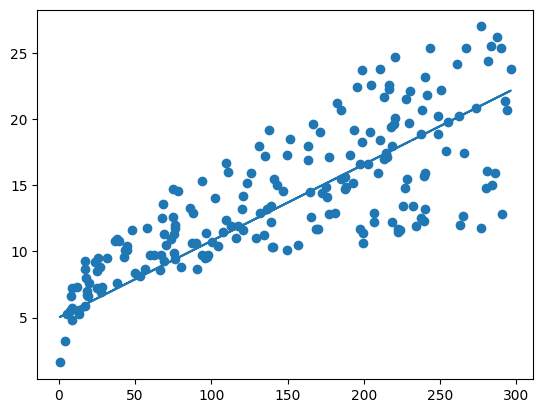

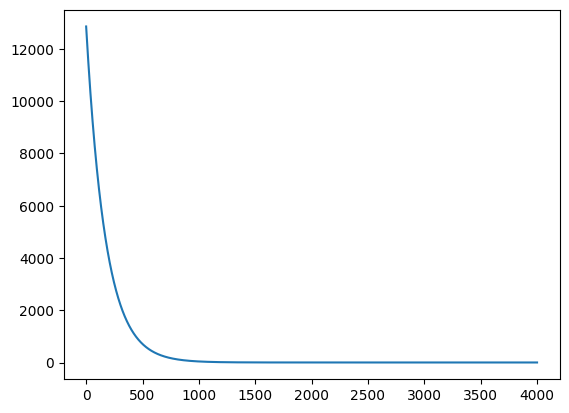

0.5730663250009927


In [18]:
for _ in range(4000):
    dj0 = ((h(features["X"])-features["Y"]).sum())/(m)
    dj1 = ((h(features["X"])-features["Y"])*features["X"]).sum()/m
    t0 -= dj0*a
    t1 -= dj1*a

    j = (((h(features["X"])-features["Y"])**2).sum())/(2*m)
    j_values.append(j)


def func(x):
    return t1*x + t0
gressedmod = list(map(func,df["X"]))

plt.scatter(df["X"],df["Y"])
plt.plot(df["X"],gressedmod)
plt.show()
plt.plot(j_values)
plt.show()
print(metrics.r2_score(df["Y"],func(df["X"])))

---

# Scipy and polynomial fit approaches

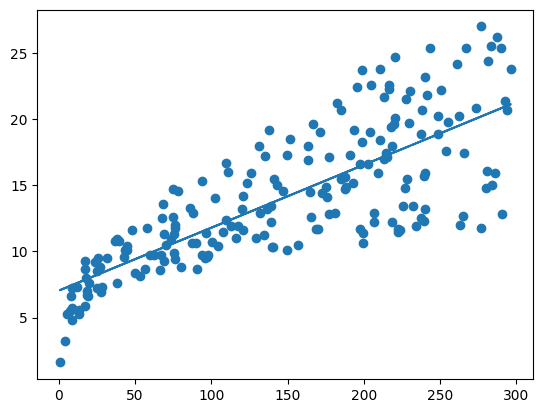

5.256326457828378


In [19]:
slope, intercept, r, p, std_err = stats.linregress(df["X"],df["Y"])
def func(x):
    return slope*x + intercept
gressedmod = list(map(func,df["X"]))

j = (((func(df["X"])-df["Y"])**2).sum())/(2*m)
plt.scatter(df["X"],df["Y"])
plt.plot(df["X"],gressedmod)
plt.show()
print(j)

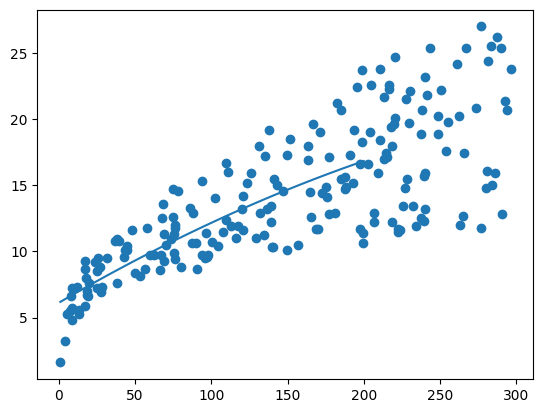

In [20]:
poly_model = np.poly1d(np.polyfit(df["X"],df["Y"],2))
plt.scatter(df["X"],df["Y"])
myline = np.linspace(1, m)
plt.plot(myline,poly_model(myline))
plt.show()